# **Importing all necessary libraries**

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# **Uploading .csv file with stock prices data**

In [ ]:
df=pd.read_csv('/kaggle/input/appleprices/AAPL.csv')
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
...,...,...,...,...,...,...,...
10844,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
10845,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100
10846,2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800
10847,2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500


# **Visualizing time series of lower and higher stock price`s during certain period**

In [ ]:
start_date='2013-12-22'
end_date='2023-12-22'
df_=df[(df['Date']>=start_date) & (df['Date']<=end_date)]
display(df_)

,Date,Open,High,Low,Close,Adj Close,Volume
8331,2013-12-23,20.285713,20.382856,20.098572,20.360357,17.849758,501306400
8332,2013-12-24,20.353214,20.424286,20.215357,20.273930,17.773983,167554800
8333,2013-12-26,20.289286,20.339287,20.120714,20.139286,17.655941,204008000
8334,2013-12-27,20.136429,20.157499,19.982143,20.003214,17.536652,225884400
8335,2013-12-30,19.909286,20.003214,19.725714,19.804285,17.362253,253629600
...,...,...,...,...,...,...,...
10844,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
10845,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100
10846,2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800
10847,2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500


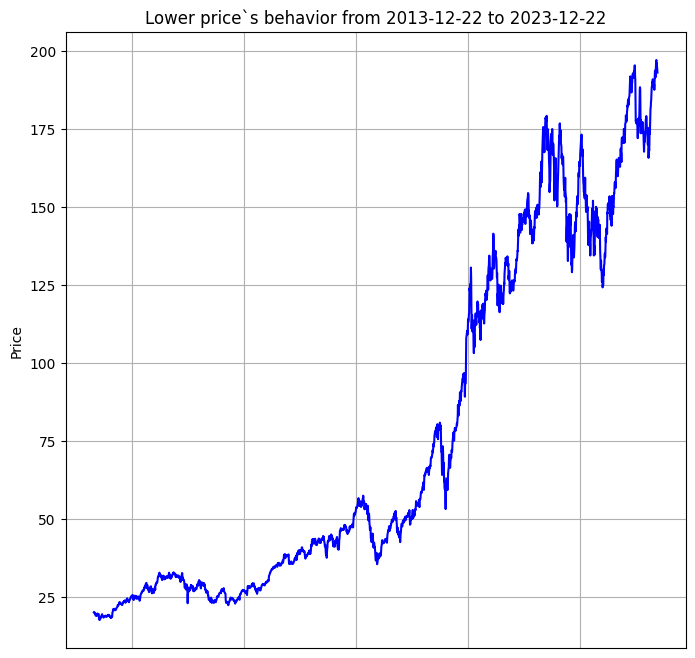

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.plot(df_['Low'],color='b')
ax.set_title('Lower price`s behavior from '+start_date+' to '+end_date)
ax.grid()
ax.set_ylabel('Price')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.show()

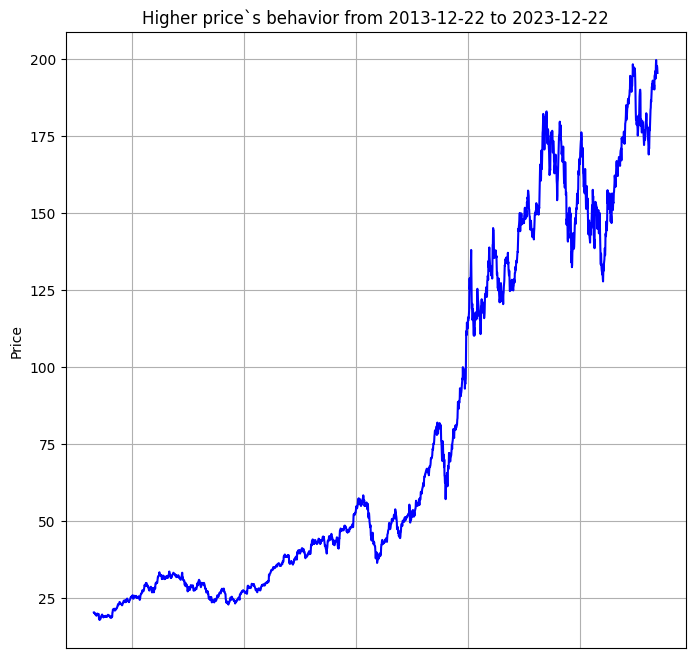

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.plot(df_['High'],color='b')
ax.set_title('Higher price`s behavior from '+start_date+' to '+end_date)
ax.grid()
ax.set_ylabel('Price')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.show()

# **Preparing dataset**

In [ ]:
prices=df_['Low'].values
print(type(prices))
print(prices)

<class 'numpy.ndarray'>
[ 20.098572  20.215357  20.120714 ... 194.830002 193.5      192.970001]


In [ ]:
pred_wind=30
n_features=1
X=[]
y=[]
for i in range(len(prices)-pred_wind):
    X.append(list(prices[i:pred_wind+i]))
    y.append(prices[pred_wind+i])
X=np.array(X)
X=X.reshape((X.shape[0],pred_wind,1))
y=np.array(y)
X,y=shuffle(X,y,random_state=1)

In [ ]:
print(X[0])
print(y[0])
print(X[1])
print(y[1])

[[70.587502]
 [69.214996]
 [69.212502]
 [66.357498]
 [68.050003]
 [68.717499]
 [69.25    ]
 [69.987503]
 [69.550003]
 [70.972504]
 [72.087502]
 [71.462502]
 [71.580002]
 [73.614998]
 [74.717499]
 [75.4925  ]
 [76.072502]
 [76.809998]
 [77.727501]
 [75.802498]
 [75.3825  ]
 [75.052498]
 [77.580002]
 [78.252502]
 [79.129997]
 [78.967499]
 [78.837502]
 [79.125   ]
 [78.272499]
 [78.907501]]
79.1175
[[124.830002]
 [126.209999]
 [126.519997]
 [125.940002]
 [126.099998]
 [127.07    ]
 [129.389999]
 [128.460007]
 [129.649994]
 [130.240005]
 [129.210007]
 [131.619995]
 [133.229996]
 [132.929993]
 [132.809998]
 [133.350006]
 [134.350006]
 [135.869995]
 [135.759995]
 [137.75    ]
 [140.070007]
 [142.660004]
 [140.669998]
 [142.649994]
 [144.      ]
 [143.630005]
 [147.679993]
 [147.089996]
 [145.880005]
 [141.669998]]
142.960007


In [ ]:
print(X.shape)
print(y.shape)

(2488, 30, 1)
(2488,)


In [ ]:
X,y=shuffle(X,y,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,random_state=1)
print(X_train.shape)
print(X_val.shape)

(1990, 30, 1)
(498, 30, 1)


In [ ]:
BATCH_SIZE=32
EPOCHS=100
train_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train))).batch(BATCH_SIZE)
train_data_sgd=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train))).batch(1)
val_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_val),tf.convert_to_tensor(y_val))).batch(BATCH_SIZE)

# **MSE loss + learning rate 1e-5**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                3840      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 6s 11ms/step - loss: 9212.9297 - val_loss: 8422.3740
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 9212.0947 - val_loss: 8421.5791
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 9211.2607 - val_loss: 8420.7852
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 9210.4248 - val_loss: 8419.99

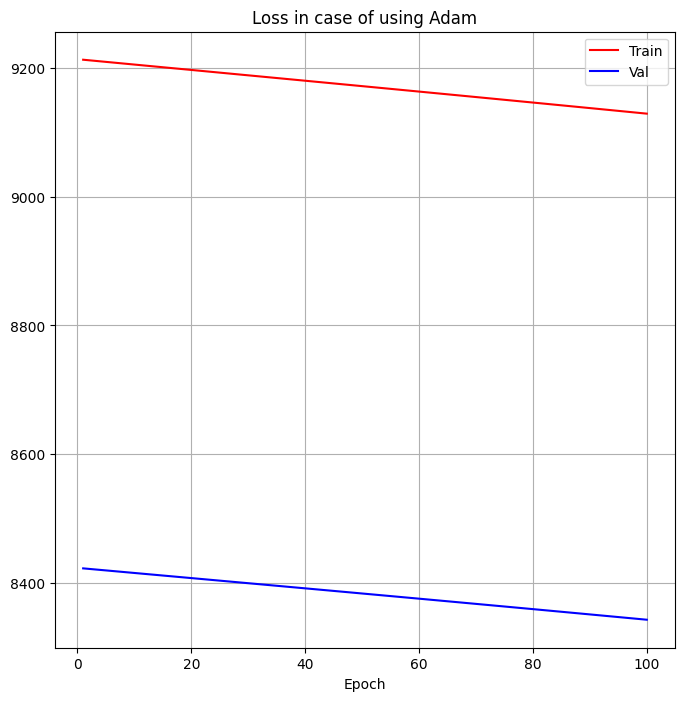

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30)                3840      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 10s 4ms/step - loss: 7770.0474 - val_loss: 5985.5605
Epoch 2/100
1990/1990 [==============================] - 7s 4ms/step - loss: 5835.0171 - val_loss: 4631.3960
Epoch 3/100
1990/1990 [==============================] - 7s 4ms/step - loss: 4703.1235 - val_loss: 3858.5215
Epoch 4/100
1990/1990 [==============================] - 7s 4ms/step - loss: 4039.6597 -

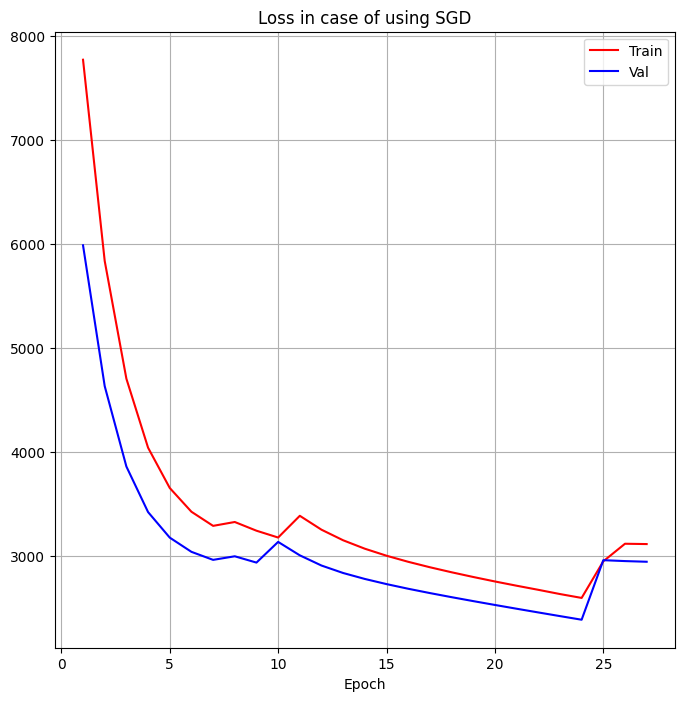

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30)                3840      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 9206.6504 - val_loss: 8416.6621
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 9206.4551 - val_loss: 8416.5234
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 9206.3281 - val_loss: 8416.4180
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 9206.2266 - val_loss: 8416.

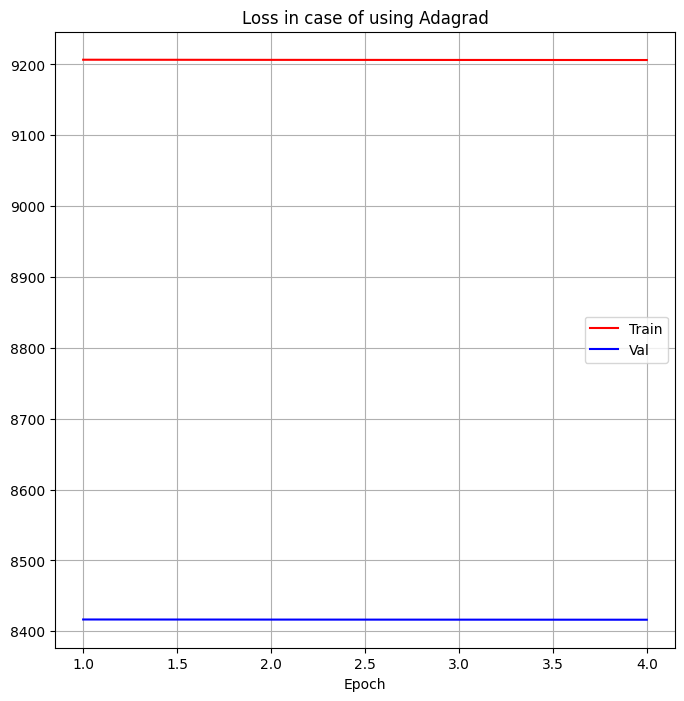

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30)                3840      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 9255.5586 - val_loss: 8462.9541
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 9254.7656 - val_loss: 8462.2090
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 9253.9814 - val_loss: 8461.4648
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 9253.2012 - val_loss: 8460.

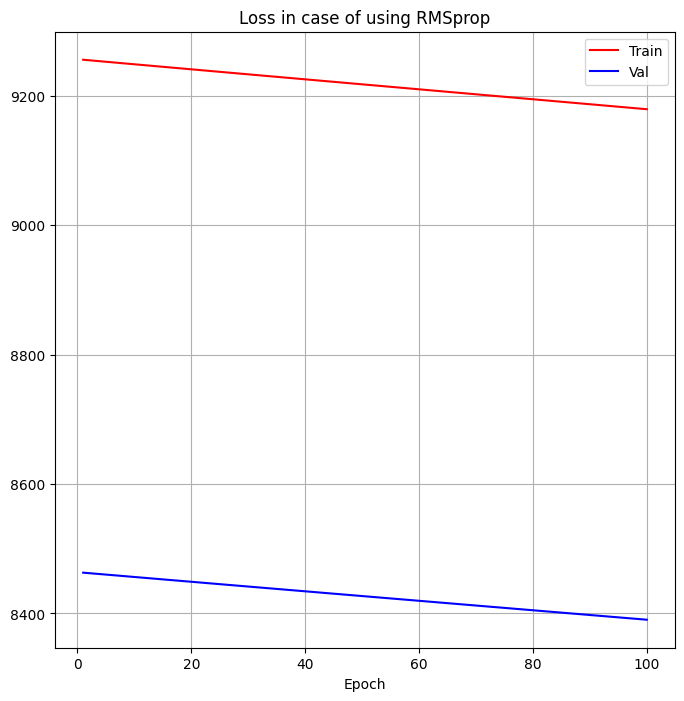

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE loss + learning rate 1e-5**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30)                3840      
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 77.7763 - val_loss: 73.9070
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 77.7719 - val_loss: 73.9025
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 77.7674 - val_loss: 73.8980
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 77.7630 - val_loss: 73.8936


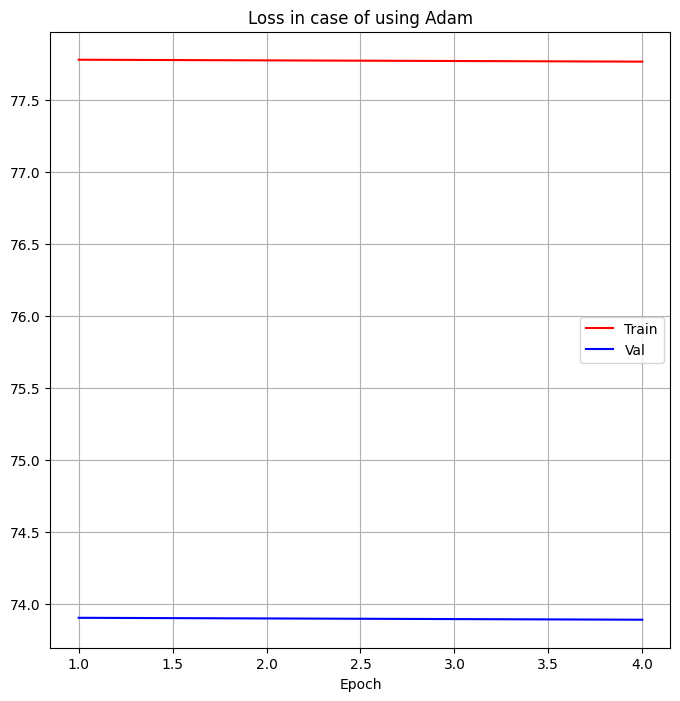

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 30)                3840      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 9s 4ms/step - loss: 77.7864 - val_loss: 73.8413
Epoch 2/100
1990/1990 [==============================] - 8s 4ms/step - loss: 77.6248 - val_loss: 73.6707
Epoch 3/100
1990/1990 [==============================] - 7s 4ms/step - loss: 77.4616 - val_loss: 73.5160
Epoch 4/100
1990/1990 [==============================] - 7s 4ms/step - loss: 77.3072 - val_loss: 73.3

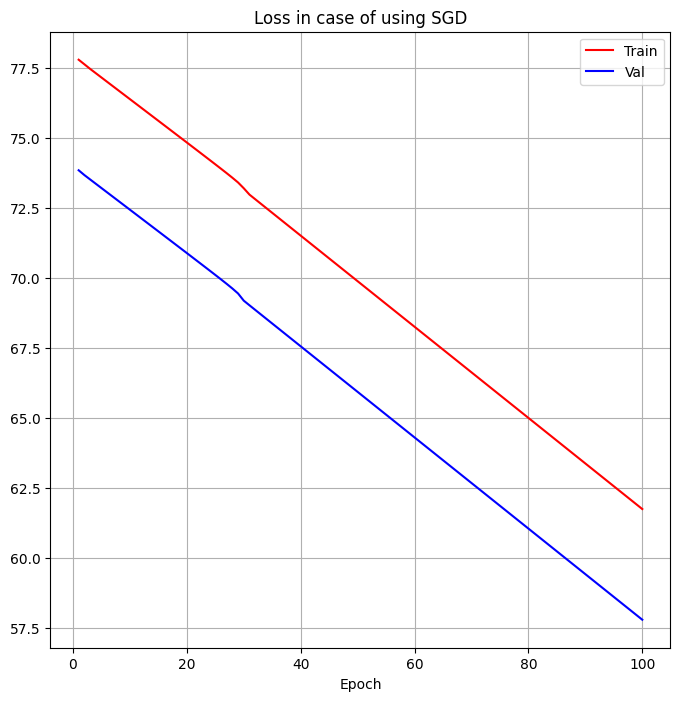

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30)                3840      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 3s 10ms/step - loss: 78.1251 - val_loss: 74.2540
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 78.1243 - val_loss: 74.2534
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 78.1238 - val_loss: 74.2530
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 78.1234 - val_loss: 74.2526


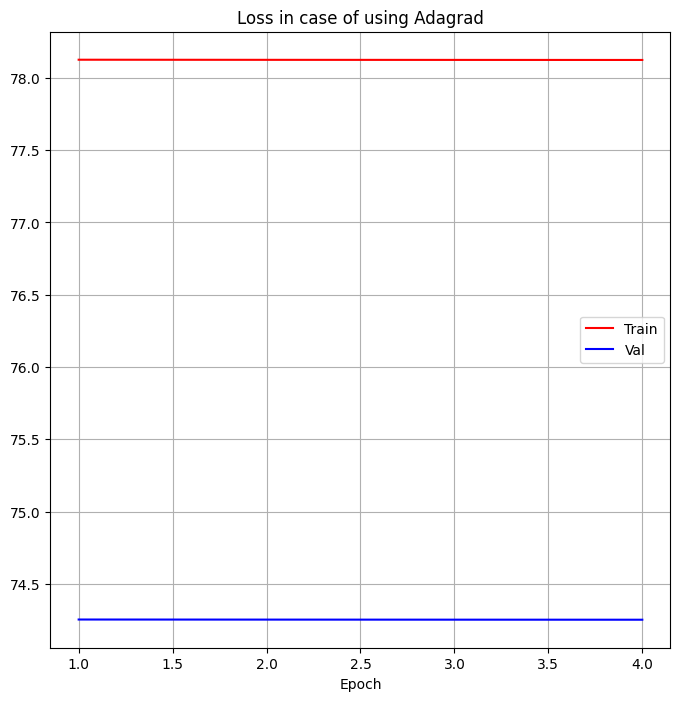

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-5),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 30)                3840      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 78.8722 - val_loss: 75.0000
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 78.8674 - val_loss: 74.9952
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 78.8627 - val_loss: 74.9905
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 78.8579 - val_loss: 74.9857


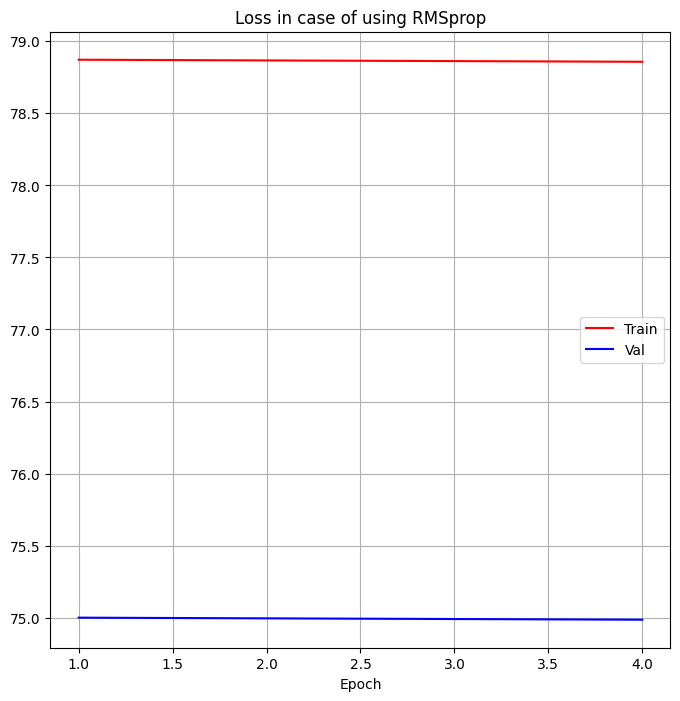

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MSE+learning rate 1e-2**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30)                3840      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 8801.3652 - val_loss: 7416.4849
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 7559.0151 - val_loss: 6320.7163
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 6473.1030 - val_loss: 5339.2671
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 5557.2124 - val_loss: 4645.

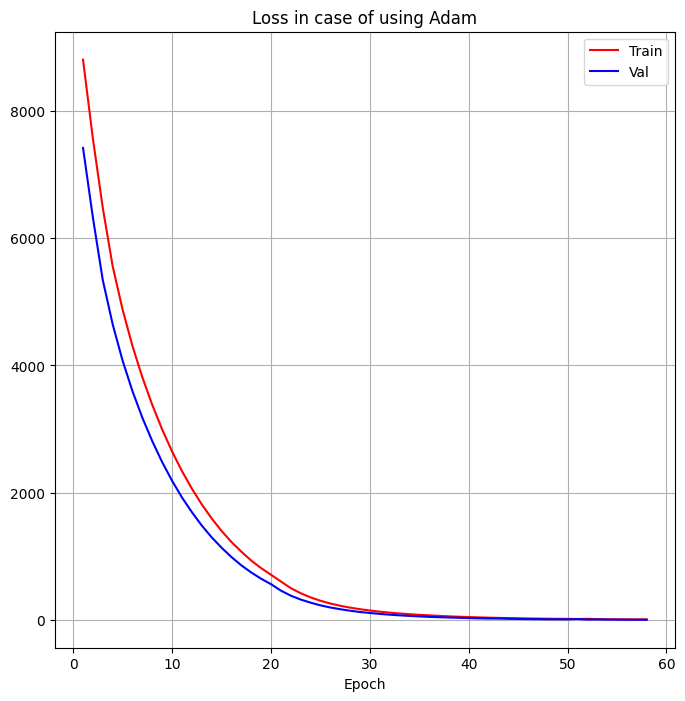

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30)                3840      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 9s 4ms/step - loss: 3363.9087 - val_loss: 3004.6636
Epoch 2/100
1990/1990 [==============================] - 7s 4ms/step - loss: 3338.4688 - val_loss: 3021.0059
Epoch 3/100
1990/1990 [==============================] - 7s 4ms/step - loss: 3341.7295 - val_loss: 3021.0056
Epoch 4/100
1990/1990 [==============================] - 8s 4ms/step - loss: 3341.7290 - 

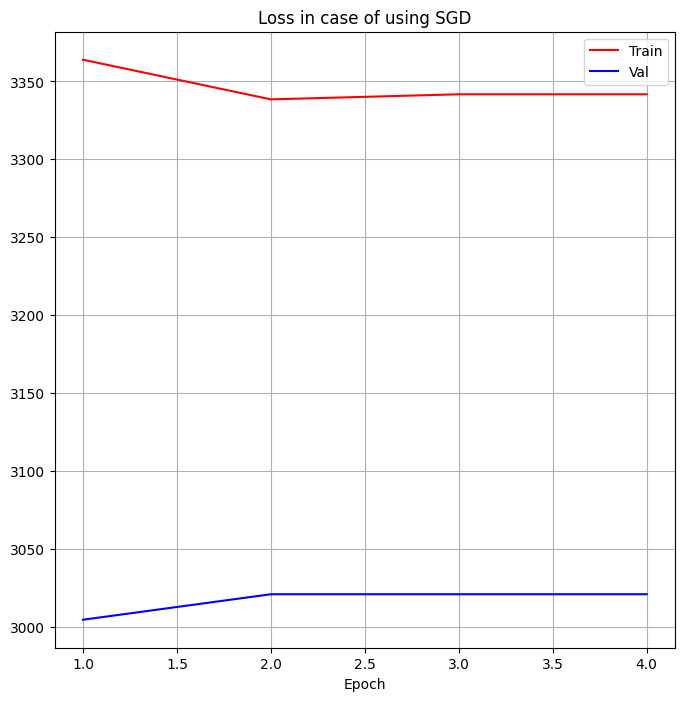

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 30)                3840      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 9047.9951 - val_loss: 8180.6309
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 8863.6240 - val_loss: 8004.8330
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 8733.3633 - val_loss: 7931.1577
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 8663.6064 - val_loss: 7871

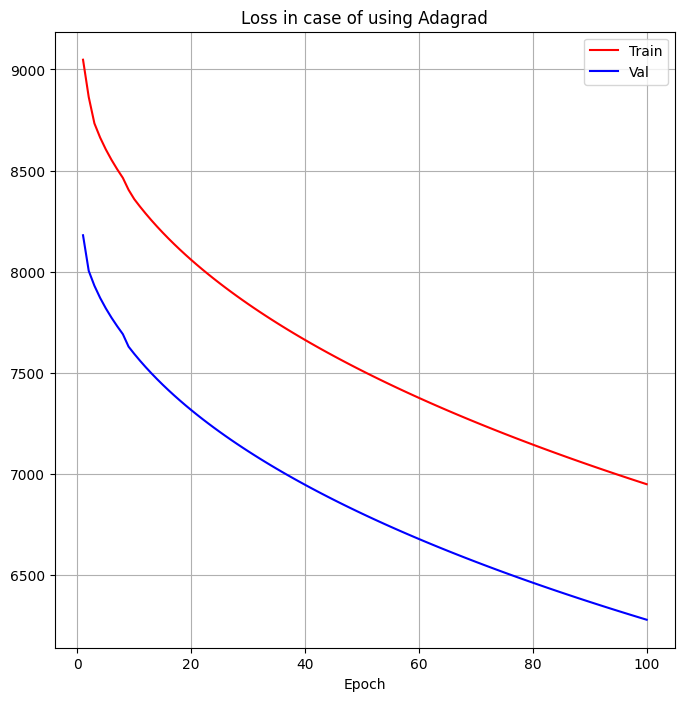

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 30)                3840      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 8690.5762 - val_loss: 7553.2500
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 7999.3462 - val_loss: 6981.1865
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 7318.2026 - val_loss: 6238.7139
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 6577.7144 - val_loss: 5628

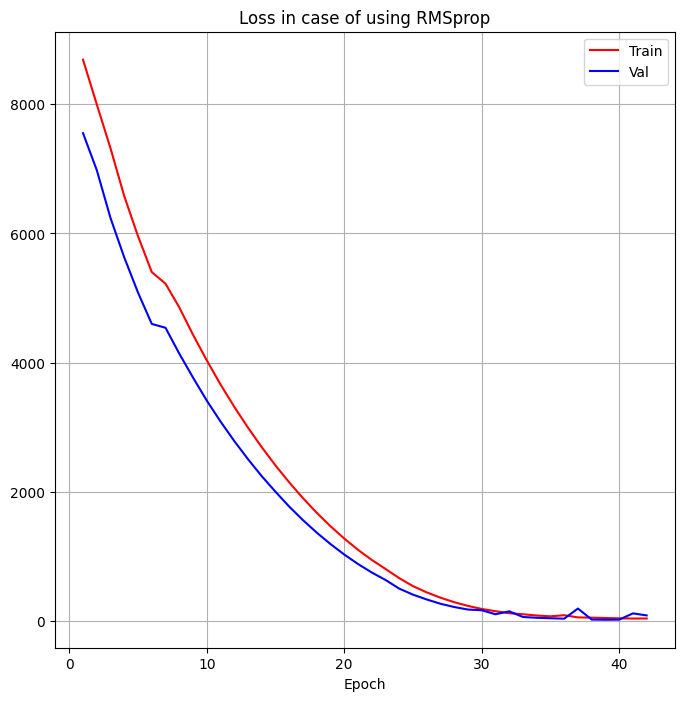

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE+learning rate 1e-2**

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30)                3840      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 74.3346 - val_loss: 65.9591
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 65.1677 - val_loss: 56.4546
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 56.4474 - val_loss: 49.1281
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 50.9469 - val_loss: 45.0398
Epoch 5/10

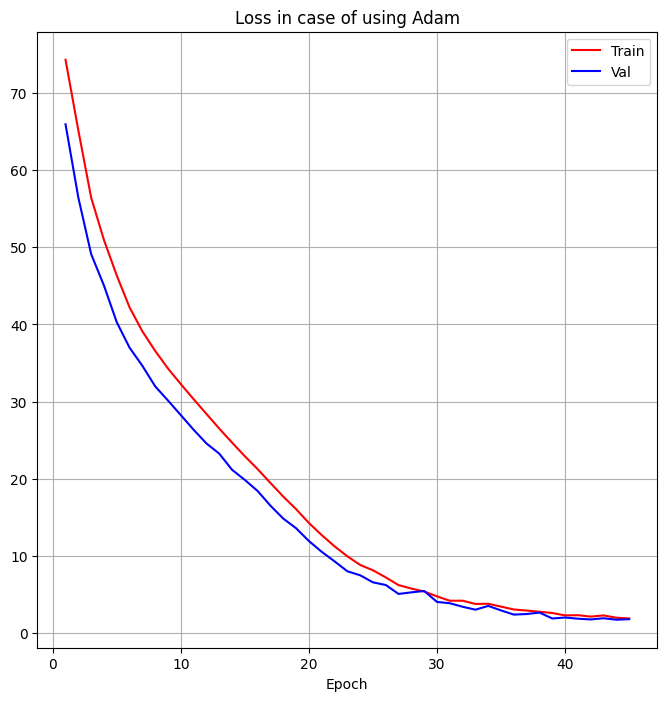

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 30)                3840      
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 9s 4ms/step - loss: 56.5497 - val_loss: 44.5941
Epoch 2/100
1990/1990 [==============================] - 7s 4ms/step - loss: 46.5634 - val_loss: 42.7881
Epoch 3/100
1990/1990 [==============================] - 7s 4ms/step - loss: 45.9041 - val_loss: 42.7109
Epoch 4/100
1990/1990 [==============================] - 8s 4ms/step - loss: 45.8406 - val_loss: 42.

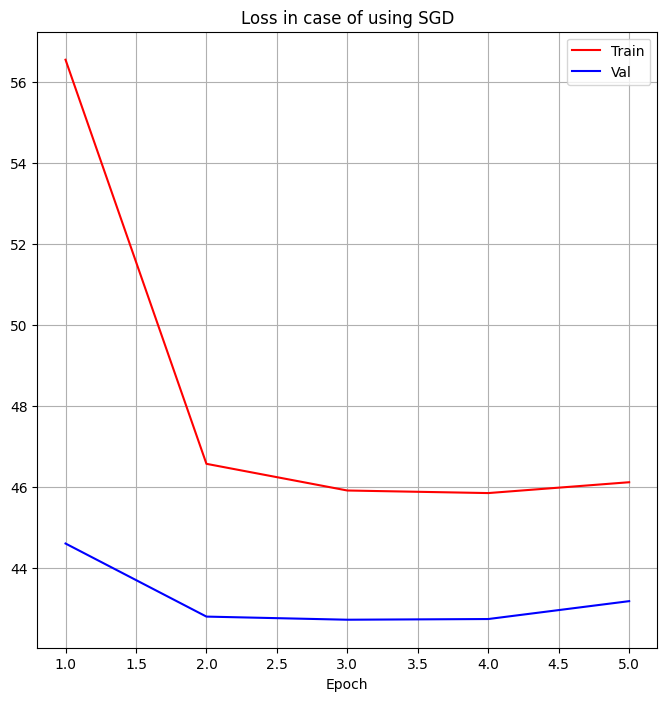

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 30)                3840      
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 76.7505 - val_loss: 72.1054
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 75.5546 - val_loss: 71.2979
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 74.8606 - val_loss: 70.6915
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 74.3066 - val_loss: 70.1834
Epoch 5/10

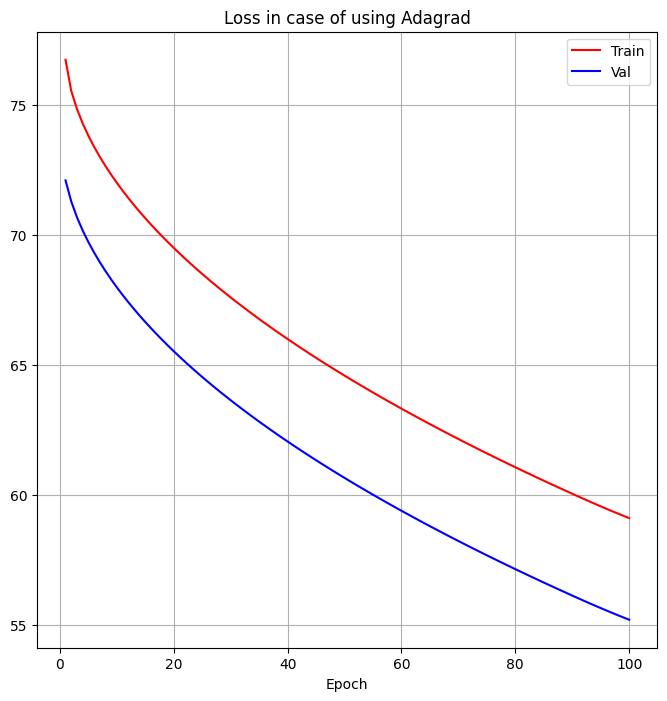

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30)                3840      
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 3s 10ms/step - loss: 73.8382 - val_loss: 66.8867
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 67.9857 - val_loss: 61.1853
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 62.2864 - val_loss: 55.4968
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 56.4136 - val_loss: 49.8459
Epoch 5/10

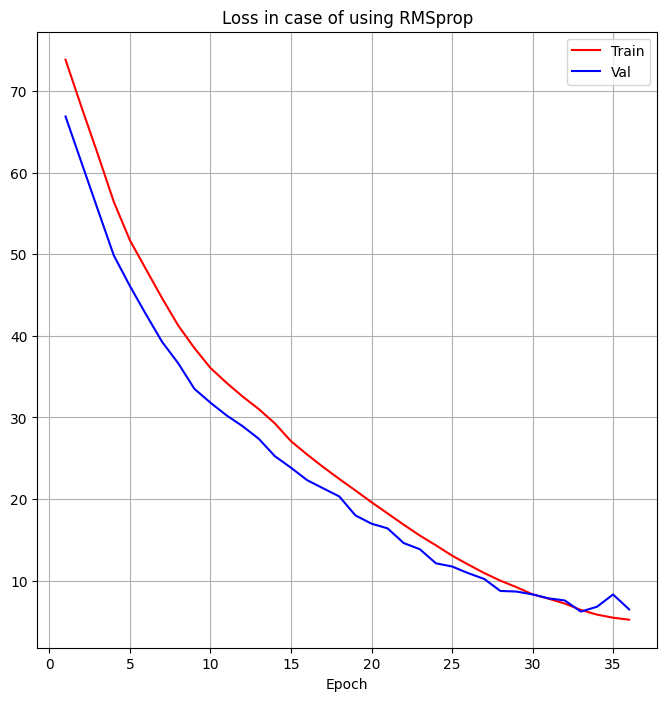

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MSE+learning rate 1e-1**

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30)                3840      
                                                                 
 dense_16 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 5693.3936 - val_loss: 2931.5190
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 2552.4119 - val_loss: 1644.4777
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 1256.3971 - val_loss: 677.6533
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 580.7395 - val_loss: 308.93

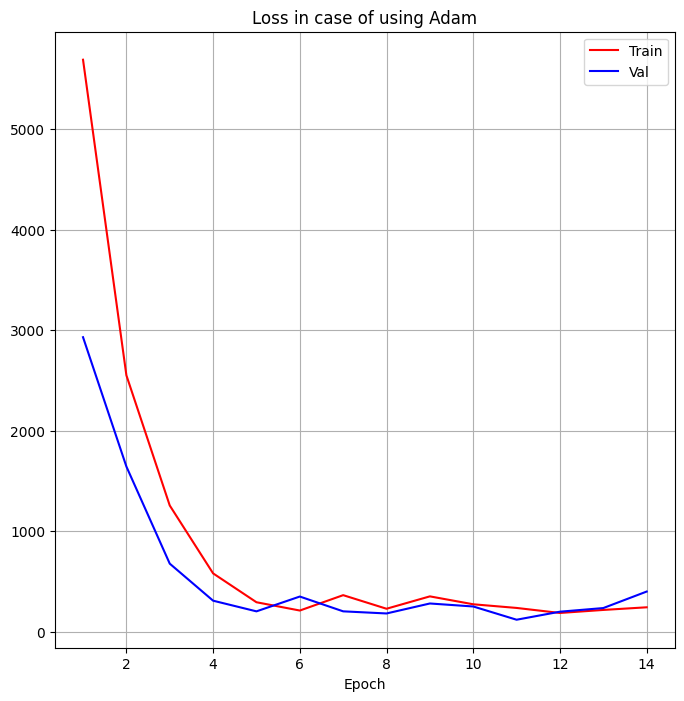

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 30)                3840      
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 9s 4ms/step - loss: 12167.7822 - val_loss: 3686.7224
Epoch 2/100
1990/1990 [==============================] - 7s 4ms/step - loss: 12869.0420 - val_loss: 3686.7246
Epoch 3/100
1990/1990 [==============================] - 7s 4ms/step - loss: 12869.0410 - val_loss: 3686.7217
Epoch 4/100
1990/1990 [==============================] - 8s 4ms/step - loss: 12869.04

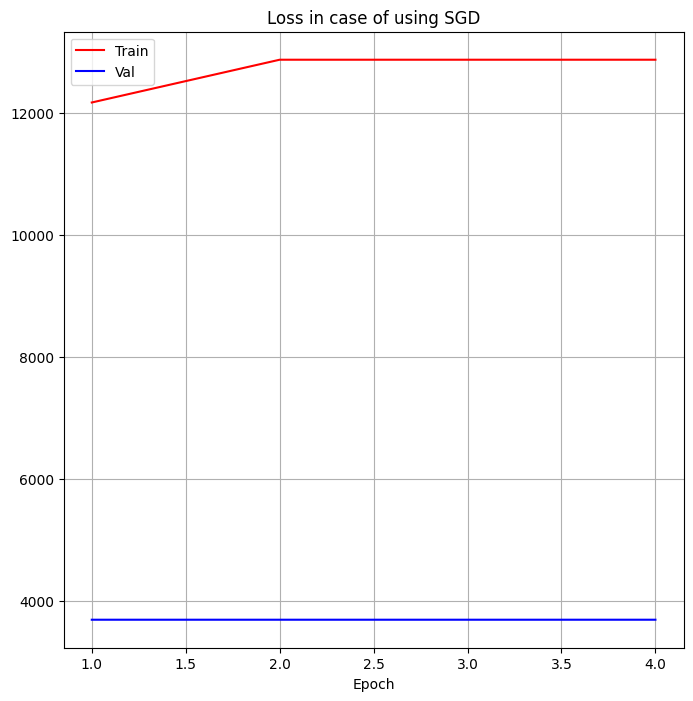

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30)                3840      
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 11ms/step - loss: 8104.6543 - val_loss: 6746.6685
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 7031.2422 - val_loss: 6015.7749
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 6411.3442 - val_loss: 5558.6958
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 5987.3608 - val_loss: 5218

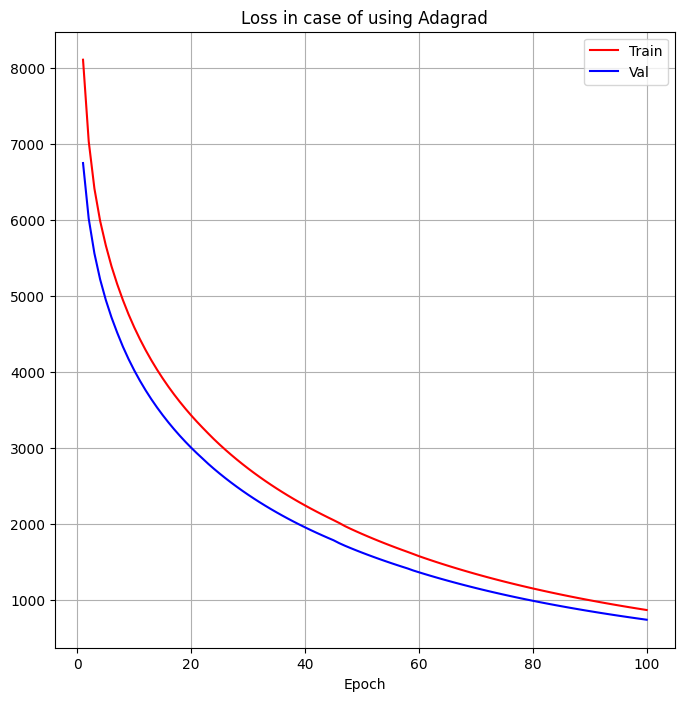

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-1),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 30)                3840      
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 3s 10ms/step - loss: 5195.9126 - val_loss: 2920.5615
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 2551.5085 - val_loss: 2318.3333
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 2141.7942 - val_loss: 1762.5996
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 1628.7968 - val_loss: 1294

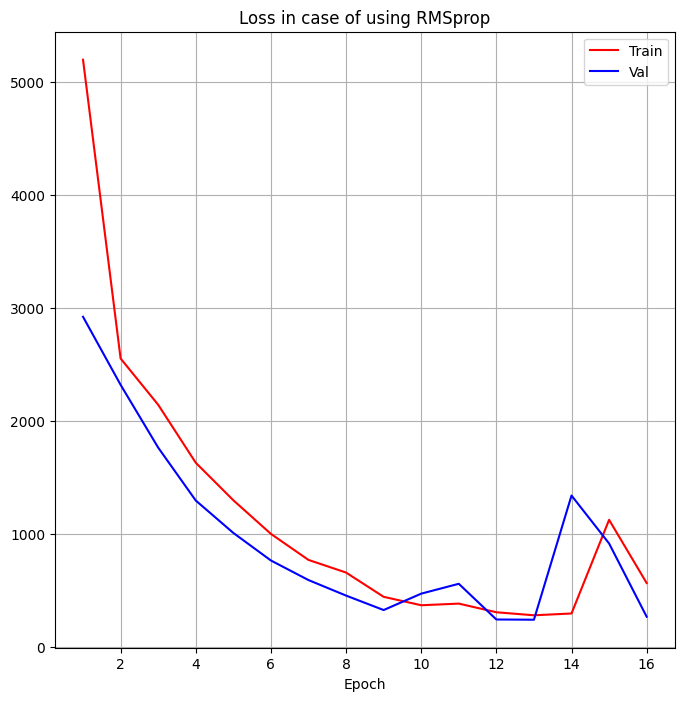

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-1),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE+learning rate 1e-1**

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30)                3840      
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 55.3786 - val_loss: 42.7321
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 45.8421 - val_loss: 42.7171
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 45.8455 - val_loss: 42.7369
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 45.8426 - val_loss: 42.7396


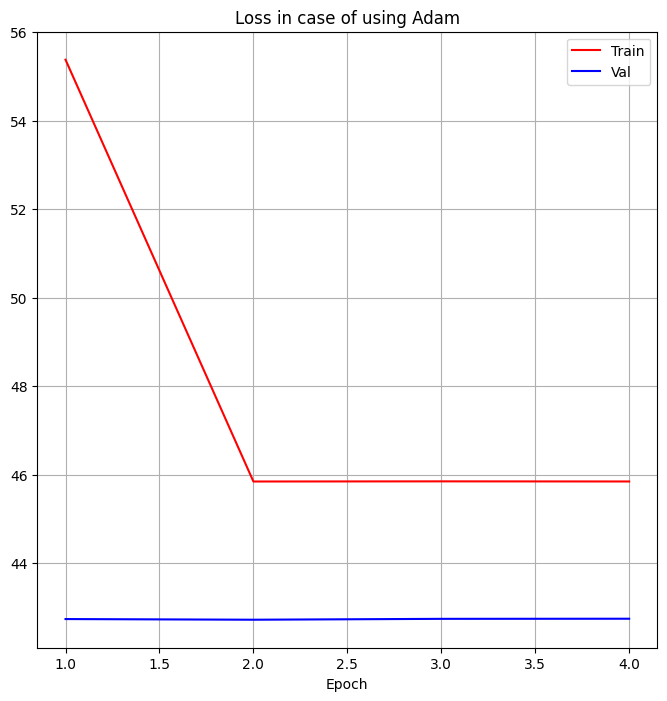

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 30)                3840      
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 9s 4ms/step - loss: 46.8123 - val_loss: 42.7542
Epoch 2/100
1990/1990 [==============================] - 8s 4ms/step - loss: 45.9527 - val_loss: 42.7544
Epoch 3/100
1990/1990 [==============================] - 8s 4ms/step - loss: 45.9526 - val_loss: 42.7544
Epoch 4/100
1990/1990 [==============================] - 7s 4ms/step - loss: 45.9525 - val_loss: 42.

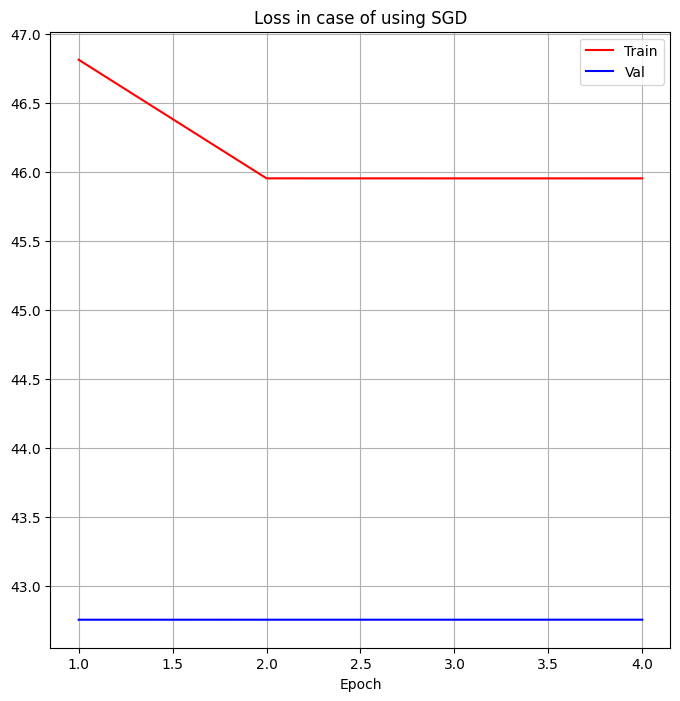

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 30)                3840      
                                                                 
 dense_22 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 70.8566 - val_loss: 62.5333
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 63.6790 - val_loss: 57.2452
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 59.1196 - val_loss: 53.3697
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 55.7329 - val_loss: 50.4993
Epoch 5/10

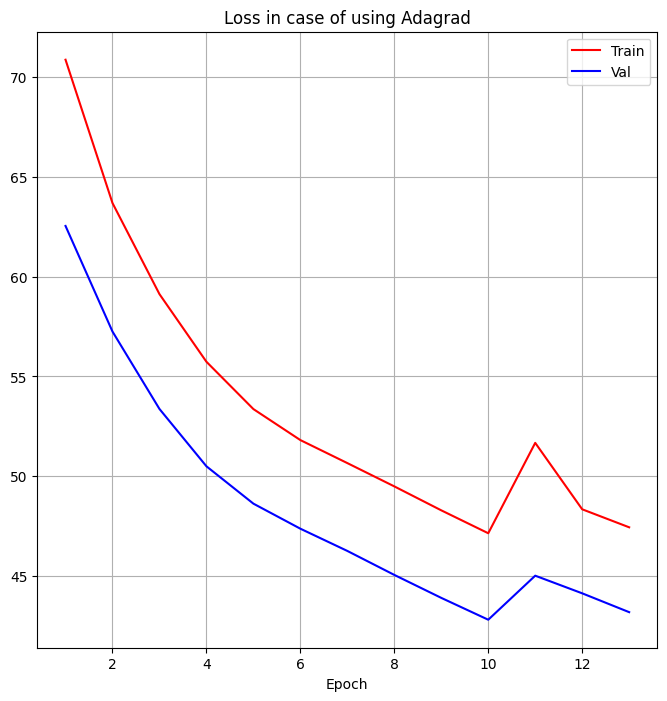

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-1),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 30)                3840      
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 52.2213 - val_loss: 40.5377
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 39.0611 - val_loss: 32.9637
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 31.7381 - val_loss: 27.3373
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 29.4796 - val_loss: 20.6016
Epoch 5/10

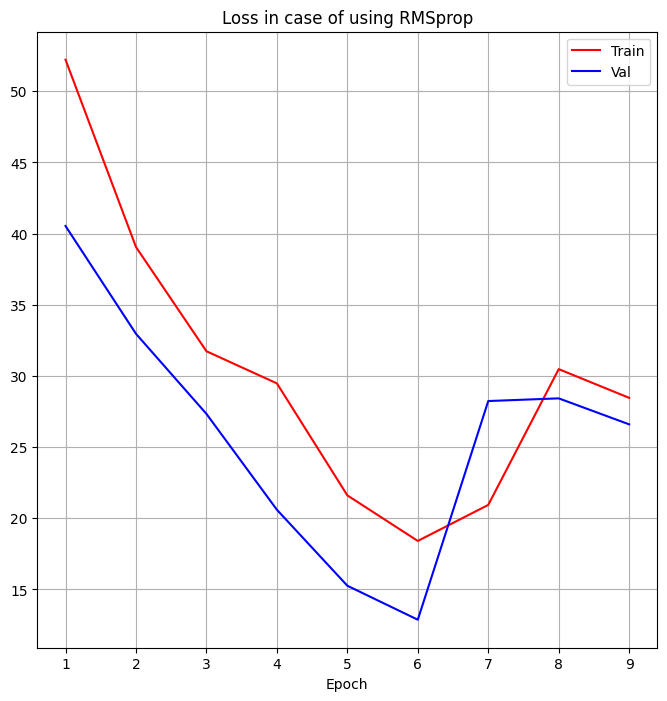

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-1),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MSE+learning rate 1e-4**

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 30)                3840      
                                                                 
 dense_24 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 9236.7686 - val_loss: 8440.6865
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 9227.0732 - val_loss: 8431.4131
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 9217.3105 - val_loss: 8422.0332
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 9207.4062 - val_loss: 8412

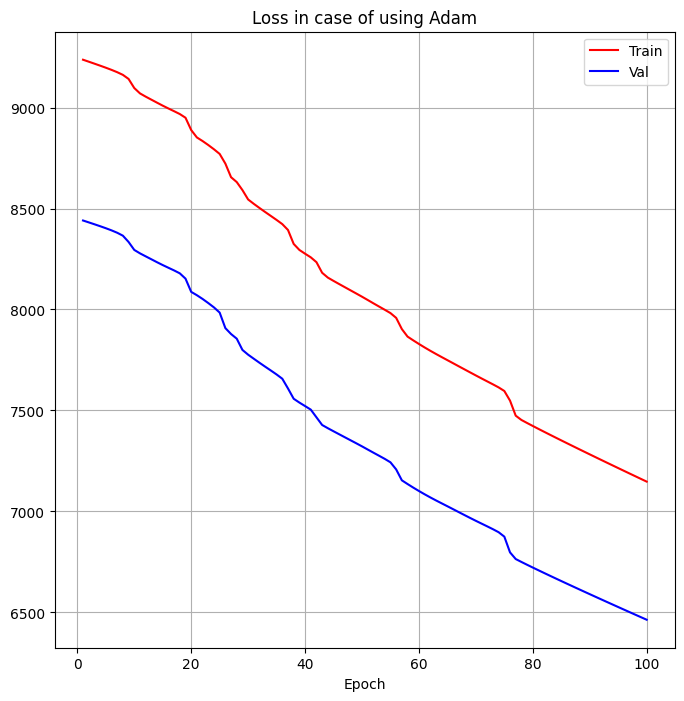

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 30)                3840      
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 9s 4ms/step - loss: 4154.9375 - val_loss: 2921.1953
Epoch 2/100
1990/1990 [==============================] - 7s 4ms/step - loss: 3127.3010 - val_loss: 2902.9934
Epoch 3/100
1990/1990 [==============================] - 7s 4ms/step - loss: 3114.0112 - val_loss: 2915.0671
Epoch 4/100
1990/1990 [==============================] - 7s 4ms/step - loss: 3111.2578 -

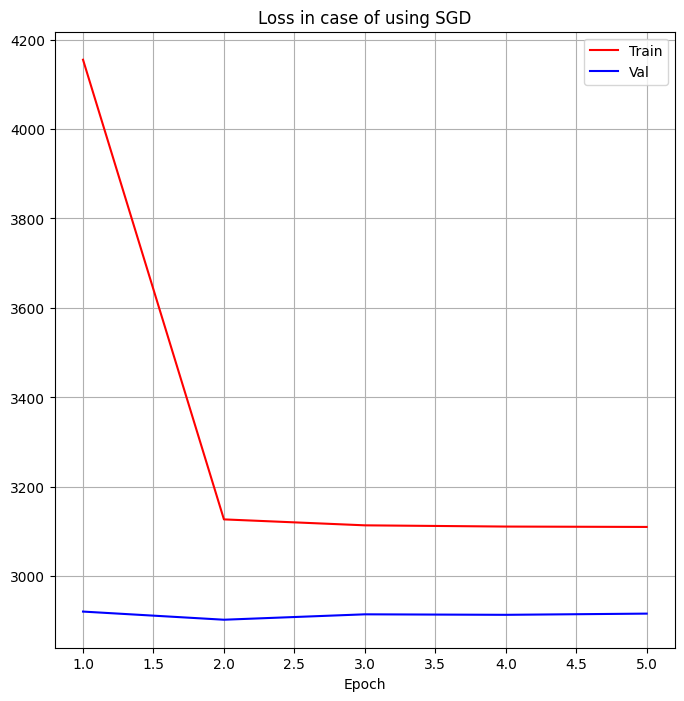

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 30)                3840      
                                                                 
 dense_26 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 9262.7725 - val_loss: 8469.7295
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 9261.8809 - val_loss: 8469.0869
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 9261.2959 - val_loss: 8468.5918
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 9260.8213 - val_loss: 8468

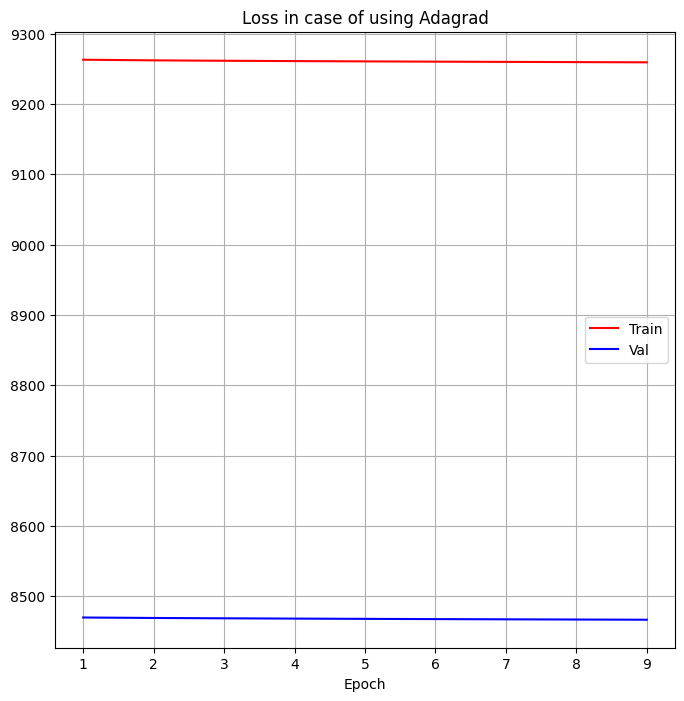

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 30)                3840      
                                                                 
 dense_27 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 9319.5928 - val_loss: 8520.8154
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 9312.3857 - val_loss: 8514.0859
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 9305.4434 - val_loss: 8507.4473
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 9298.5674 - val_loss: 8500

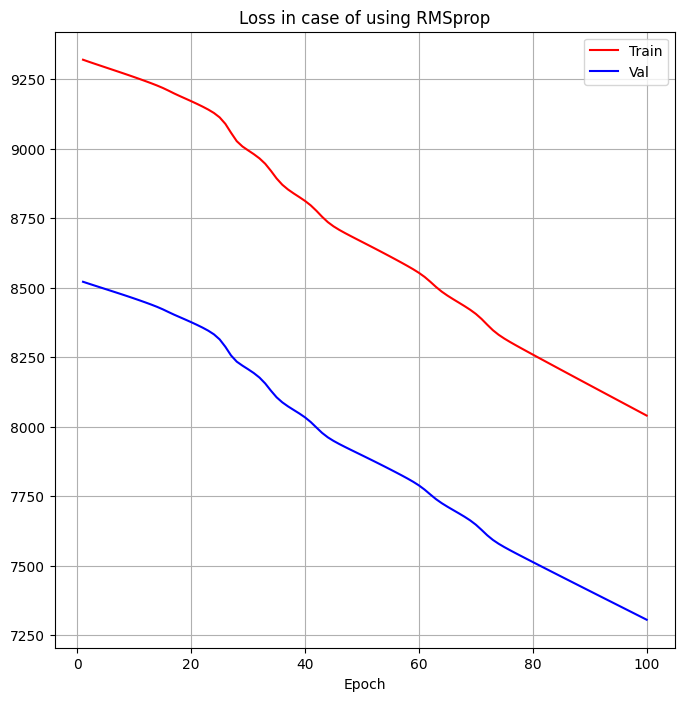

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE+learning rate 1e-4**

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 30)                3840      
                                                                 
 dense_28 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 3s 10ms/step - loss: 76.4193 - val_loss: 72.5083
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 76.3377 - val_loss: 72.4223
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 76.2490 - val_loss: 72.3304
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 76.1506 - val_loss: 72.2201
Epoch 5/10

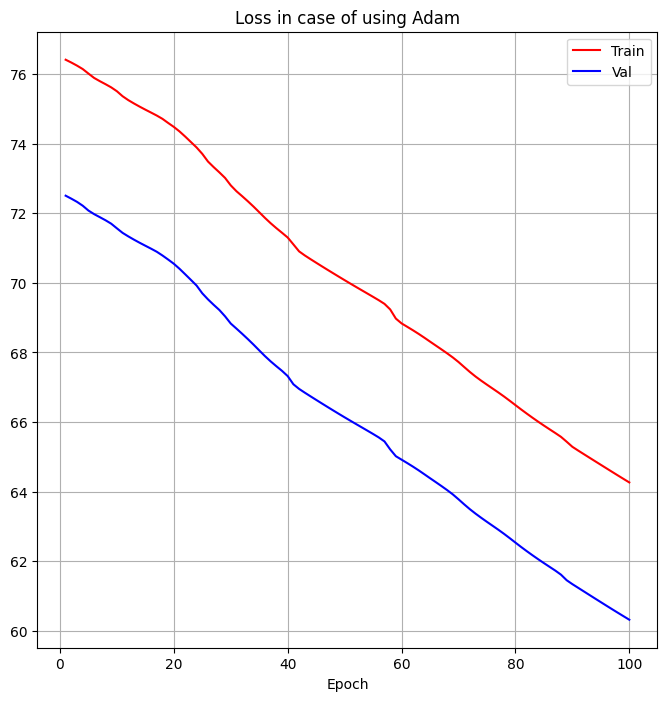

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 30)                3840      
                                                                 
 dense_29 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 9s 4ms/step - loss: 77.3316 - val_loss: 72.7305
Epoch 2/100
1990/1990 [==============================] - 7s 4ms/step - loss: 75.8740 - val_loss: 71.2795
Epoch 3/100
1990/1990 [==============================] - 8s 4ms/step - loss: 74.4171 - val_loss: 69.8130
Epoch 4/100
1990/1990 [==============================] - 7s 4ms/step - loss: 72.9258 - val_loss: 68.

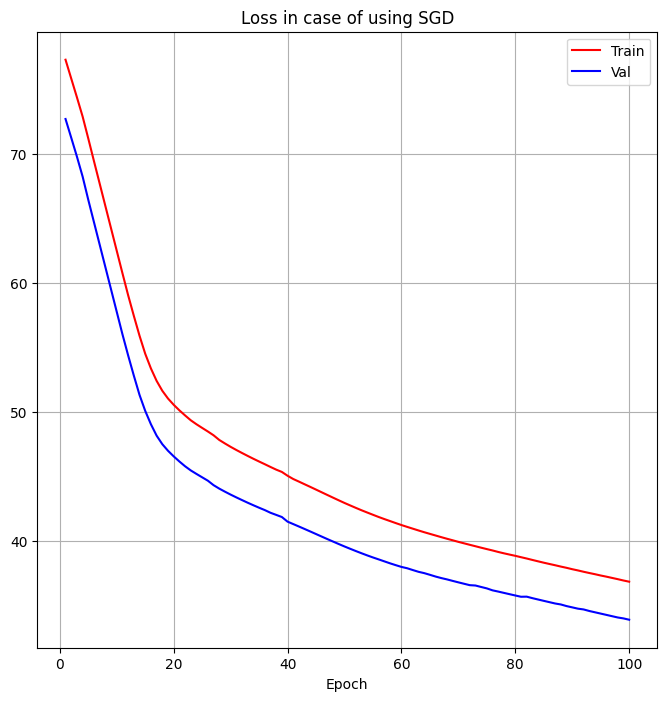

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 30)                3840      
                                                                 
 dense_30 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 78.9664 - val_loss: 75.0922
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 78.9563 - val_loss: 75.0847
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 78.9498 - val_loss: 75.0790
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 78.9445 - val_loss: 75.0742


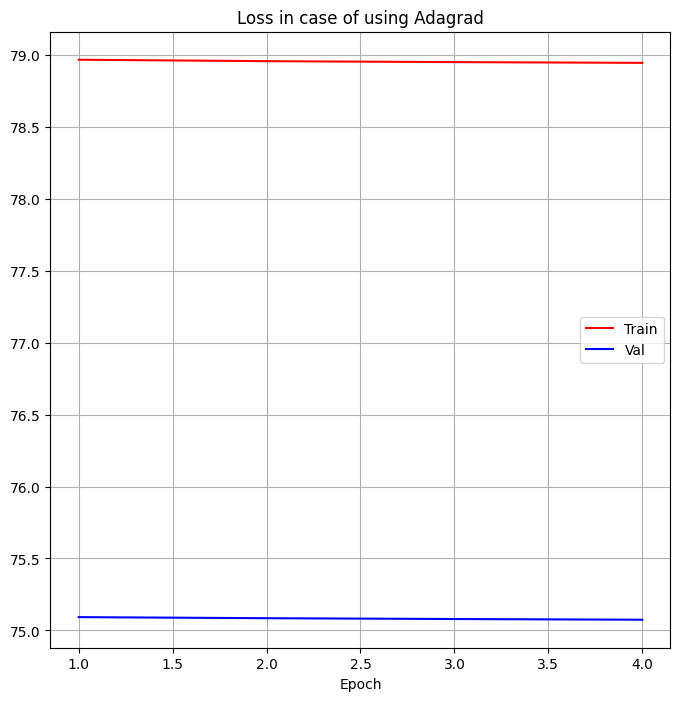

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 30)                3840      
                                                                 
 dense_31 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 77.4199 - val_loss: 73.5251
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 77.3707 - val_loss: 73.4761
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 77.3214 - val_loss: 73.4262
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 77.2713 - val_loss: 73.3752
Epoch 5/10

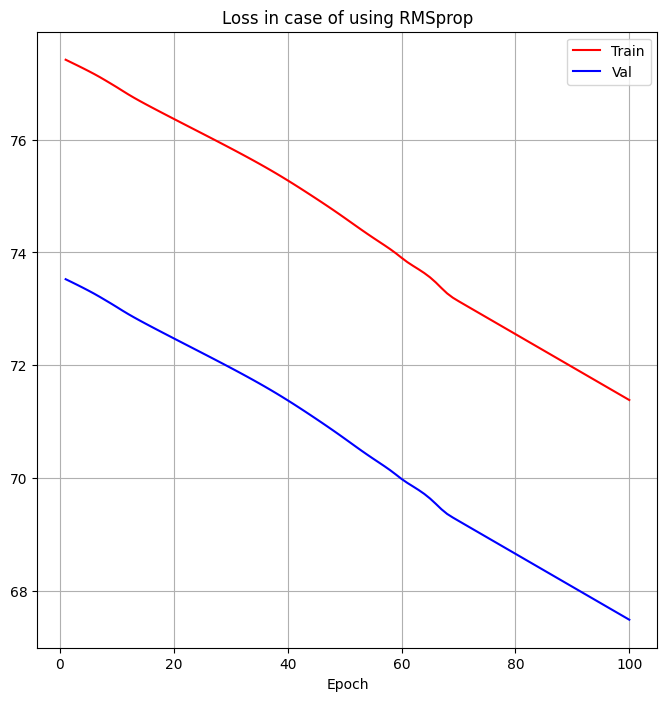

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MSE+learning rate 1e-3**

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 30)                3840      
                                                                 
 dense_32 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 3s 10ms/step - loss: 9175.5547 - val_loss: 8326.8633
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 9068.6084 - val_loss: 8241.6533
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 8945.9805 - val_loss: 8063.5137
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 8781.6660 - val_loss: 7958

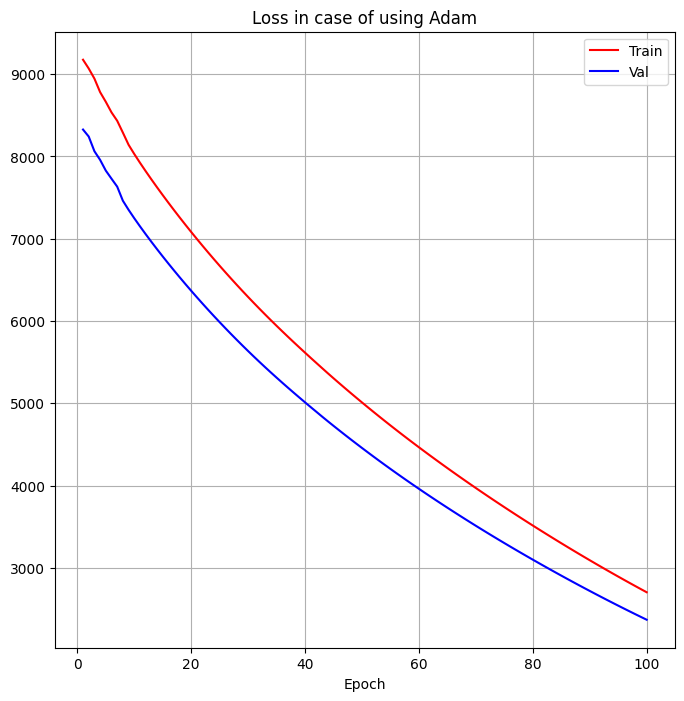

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 30)                3840      
                                                                 
 dense_33 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 10s 4ms/step - loss: 3263.5984 - val_loss: 2906.7231
Epoch 2/100
1990/1990 [==============================] - 7s 4ms/step - loss: 3141.5574 - val_loss: 2907.0410
Epoch 3/100
1990/1990 [==============================] - 8s 4ms/step - loss: 3141.5144 - val_loss: 2907.0408
Epoch 4/100
1990/1990 [==============================] - 7s 4ms/step - loss: 3141.5115 

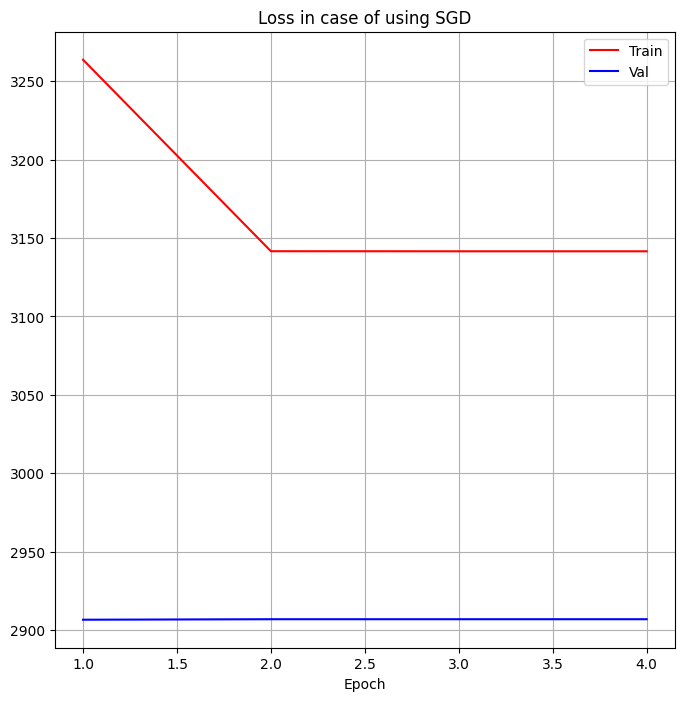

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 30)                3840      
                                                                 
 dense_34 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 9330.6514 - val_loss: 8528.9561
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 9321.1250 - val_loss: 8521.9258
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 9314.6084 - val_loss: 8516.2227
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 9309.0293 - val_loss: 8511

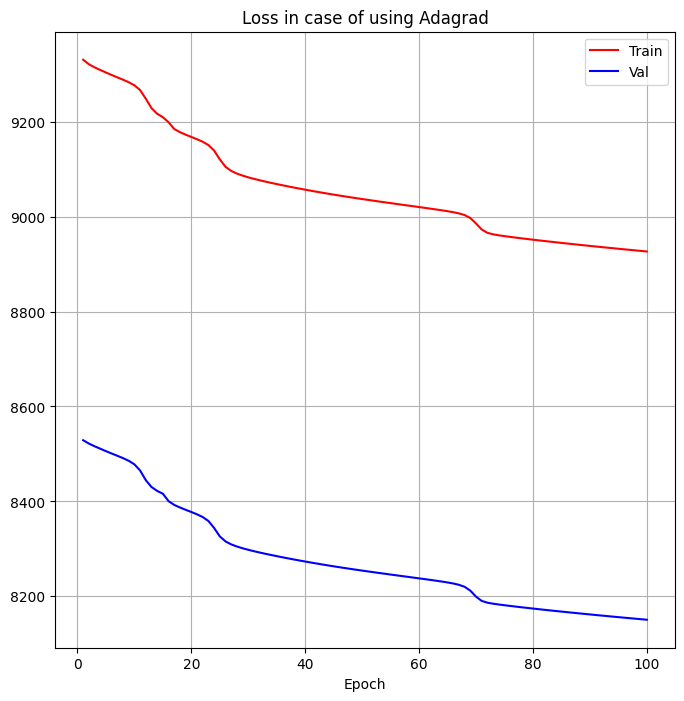

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 30)                3840      
                                                                 
 dense_35 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 9178.6807 - val_loss: 8329.2178
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 9032.0840 - val_loss: 8143.4077
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 8845.1787 - val_loss: 7978.0649
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 8669.0498 - val_loss: 7785

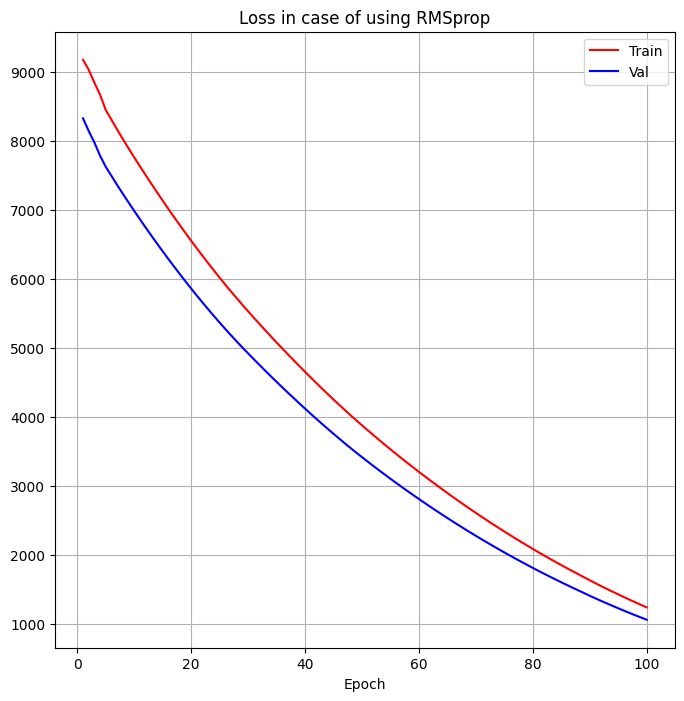

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE+learning rate 1e-3**

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 30)                3840      
                                                                 
 dense_36 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 78.0158 - val_loss: 73.7440
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 77.1278 - val_loss: 72.8346
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 76.0499 - val_loss: 71.3498
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 74.1905 - val_loss: 69.2408
Epoch 5/10

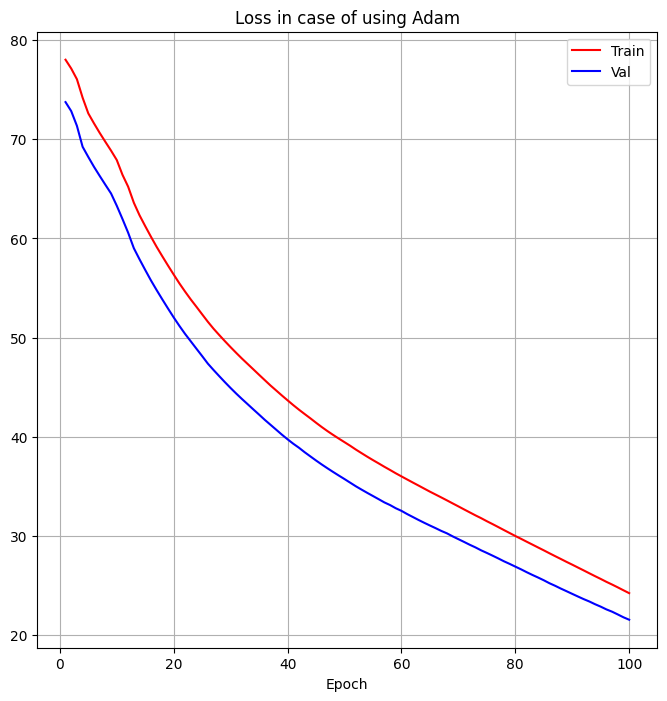

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 30)                3840      
                                                                 
 dense_37 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1990/1990 [==============================] - 9s 4ms/step - loss: 73.7296 - val_loss: 65.1300
Epoch 2/100
1990/1990 [==============================] - 7s 4ms/step - loss: 64.2844 - val_loss: 55.6993
Epoch 3/100
1990/1990 [==============================] - 8s 4ms/step - loss: 55.5599 - val_loss: 48.5116
Epoch 4/100
1990/1990 [==============================] - 7s 4ms/step - loss: 50.7502 - val_loss: 45.

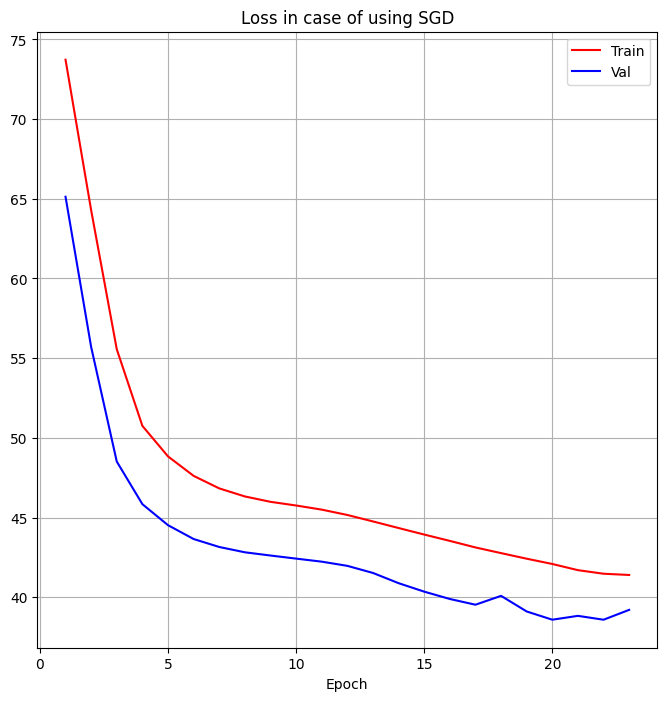

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 30)                3840      
                                                                 
 dense_38 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 76.6404 - val_loss: 72.7121
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 76.5432 - val_loss: 72.6416
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 76.4825 - val_loss: 72.5885
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 76.4341 - val_loss: 72.5442
Epoch 5/10

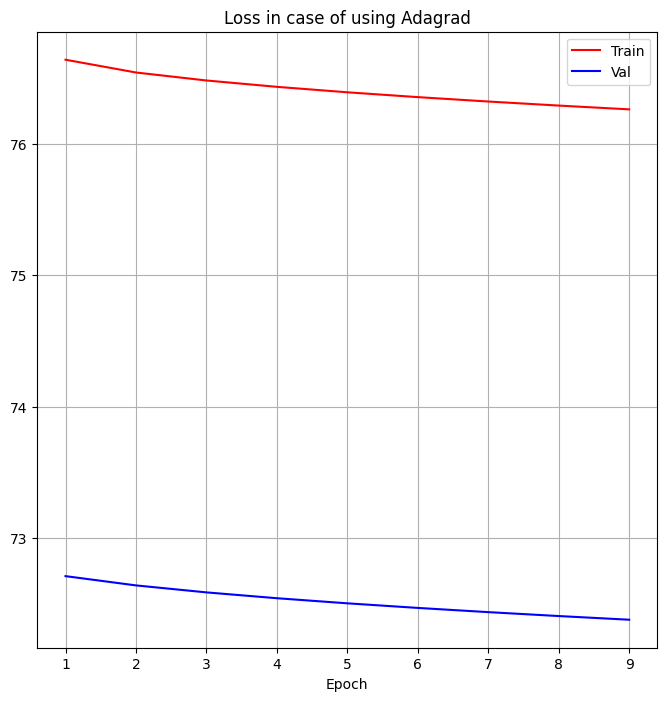

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 30)                3840      
                                                                 
 dense_39 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 10ms/step - loss: 77.4491 - val_loss: 73.2513
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 76.8286 - val_loss: 72.6542
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 76.2279 - val_loss: 72.0330
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 75.5398 - val_loss: 71.2574
Epoch 5/10

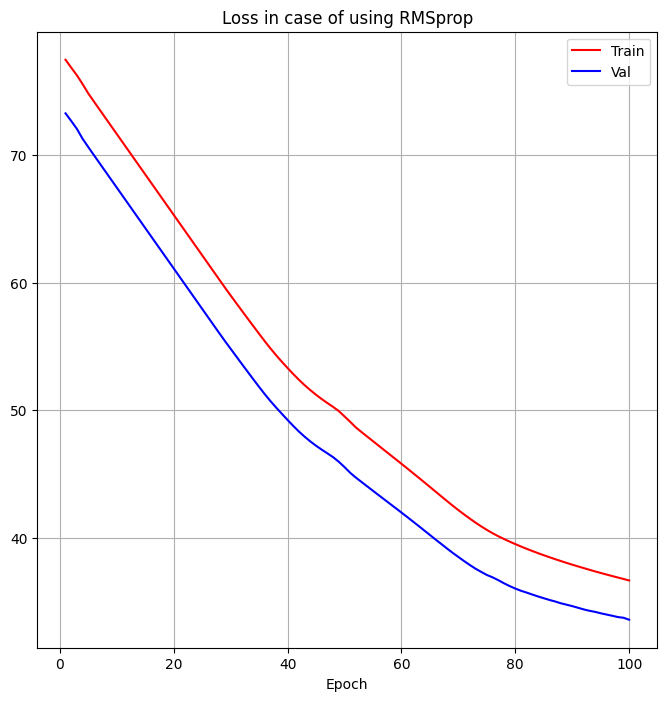

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()